### Importing Libraries

In [146]:
# Importing basic libraries
import numpy as np
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns


# Importing libraries for data pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
 


#Importing libraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier



#Importing libraries for model evaluation 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score    
from sklearn.metrics import confusion_matrix, accuracy_score 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


  
#Importing libraries for data visualization
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Importing libraries for other utilities
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse


### Reading Data

In [147]:
# importing the input data
df = pd.read_excel('Creators_case_study_sample_data.xlsx')

In [148]:
# Printing first 5 rows
df.head()

,CID,Sex,Aged,Hasaspouse,Reliesuponsomeone,duration,Youtube TV,Multiple Screens,Music Service,Hasmorethan3Playlists,Followsmorethan5artists,Haslistenedtomorethan5audiobooks,TechSupport,Listens Podcast,Listens Music,subscription type,online invoice,monthly invoice,TotalCharges,At risk,type of payment
0,1,Male,0,No,No,34,Yes,No,Hulu Music,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,No,courier check
1,2,Male,0,No,No,2,Yes,No,Hulu Music,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes,courier check
2,3,Female,0,No,No,2,Yes,No,Yotube Music,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes,echeck
3,4,Female,0,No,No,8,Yes,Yes,Yotube Music,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,99.65,820.50,Yes,echeck
4,5,Male,0,No,Yes,22,Yes,Yes,Yotube Music,No,Yes,No,No,Yes,No,Month-to-month,Yes,89.10,1949.40,No,cc


In [149]:
# Checking the shape of dataset
df.shape

(4895, 21)

In [150]:
print("The dataset has",df.shape[0],"rows and", df.shape[1],"columns.")

The dataset has 4895 rows and 21 columns.


In [151]:
# To print all the column names
print(df.columns.values)

['CID' 'Sex' 'Aged' 'Hasaspouse' 'Reliesuponsomeone' 'duration'
 'Youtube TV' 'Multiple Screens' 'Music Service' 'Hasmorethan3Playlists'
 'Followsmorethan5artists' 'Haslistenedtomorethan5audiobooks'
 'TechSupport' 'Listens Podcast' 'Listens Music' 'subscription type'
 'online invoice' 'monthly invoice' 'TotalCharges' 'At risk'
 'type of payment']


In [152]:
# To print some general information about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CID                               4895 non-null   int64  
 1   Sex                               4895 non-null   object 
 2   Aged                              4895 non-null   int64  
 3   Hasaspouse                        4895 non-null   object 
 4   Reliesuponsomeone                 4895 non-null   object 
 5   duration                          4895 non-null   int64  
 6   Youtube TV                        4895 non-null   object 
 7   Multiple Screens                  4895 non-null   object 
 8   Music Service                     4895 non-null   object 
 9   Hasmorethan3Playlists             4895 non-null   object 
 10  Followsmorethan5artists           4895 non-null   object 
 11  Haslistenedtomorethan5audiobooks  4895 non-null   object 
 12  TechSu

In [153]:
# Creating a list of categorical fields
Categorical_Fields = ['Sex','Hasaspouse','Reliesuponsomeone','Youtube TV','Multiple Screens','Music Service',
                      'Hasmorethan3Playlists','Followsmorethan5artists','Followsmorethan5artists',
                      'Haslistenedtomorethan5audiobooks','TechSupport','Listens Podcast','Listens Music',
                      'subscription type','online invoice','type of payment']

In [154]:
# basic statistical characteristics of each numerical feature
df.describe()

,CID,Aged,duration,monthly invoice,TotalCharges
count,4895.000000,4895.000000,4895.00000,4895.000000,4885.000000
mean,2448.000000,0.161798,32.60715,64.613258,2301.542436
std,1413.209114,0.368303,24.77136,30.210730,2290.189401
min,1.000000,0.000000,0.00000,18.250000,18.800000
25%,1224.500000,0.000000,9.00000,35.000000,393.150000
50%,2448.000000,0.000000,29.00000,70.350000,1397.300000
75%,3671.500000,0.000000,56.00000,89.750000,3857.100000
max,4895.000000,1.000000,72.00000,118.650000,8684.800000


In [155]:
# Description of object datatype fields
df.describe(include=["object"])

,Sex,Hasaspouse,Reliesuponsomeone,Youtube TV,Multiple Screens,Music Service,Hasmorethan3Playlists,Followsmorethan5artists,Haslistenedtomorethan5audiobooks,TechSupport,Listens Podcast,Listens Music,subscription type,online invoice,At risk,type of payment
count,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,2,4
top,Male,No,No,Yes,No,Yotube Music,No,No,No,No,No,Yes,Month-to-month,Yes,No,echeck
freq,2487,2553,3423,4416,2355,2134,2395,2136,2115,2361,1944,1912,2657,2857,3635,1607


In [156]:
# Check missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,TotalCharges,type of payment,Hasmorethan3Playlists,Sex,Aged,Hasaspouse,Reliesuponsomeone,duration,Youtube TV,Multiple Screens,Music Service,Followsmorethan5artists,At risk,Haslistenedtomorethan5audiobooks,TechSupport,Listens Podcast,Listens Music,subscription type,online invoice,monthly invoice,CID
Total,10.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.20429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 10 missing values in TotalCharges field. Let's explore more about the missing values like the cause and how we can handle them.

In [157]:
df1 = df[df.isna().any(axis=1)]

In [158]:
df1

,CID,Sex,Aged,Hasaspouse,Reliesuponsomeone,duration,Youtube TV,Multiple Screens,Music Service,Hasmorethan3Playlists,Followsmorethan5artists,Haslistenedtomorethan5audiobooks,TechSupport,Listens Podcast,Listens Music,subscription type,online invoice,monthly invoice,TotalCharges,At risk,type of payment
323,324,Female,0,Yes,Yes,0,No,No Youtube TV,Hulu Music,Yes,No,Yes,Yes,Yes,No,Two year,Yes,52.55,NaN,No,online banking
496,497,Male,0,No,Yes,0,Yes,No,No,No music service,No music service,No music service,No music service,No music service,No music service,Two year,No,20.25,NaN,No,courier check
621,622,Female,0,Yes,Yes,0,Yes,No,Hulu Music,Yes,Yes,Yes,No,Yes,Yes,Two year,No,80.85,NaN,No,courier check
720,721,Male,0,Yes,Yes,0,Yes,Yes,No,No music service,No music service,No music service,No music service,No music service,No music service,Two year,No,25.75,NaN,No,courier check
898,899,Female,0,Yes,Yes,0,No,No Youtube TV,Hulu Music,Yes,Yes,Yes,Yes,Yes,No,Two year,No,56.05,NaN,No,cc
2315,2316,Male,0,Yes,Yes,0,Yes,No,No,No music service,No music service,No music service,No music service,No music service,No music service,Two year,No,19.85,NaN,No,courier check
3054,3055,Female,0,Yes,Yes,0,Yes,No,No,No music service,No music service,No music service,No music service,No music service,No music service,Two year,No,20.00,NaN,No,courier check
3634,3635,Male,0,Yes,Yes,0,Yes,No,No,No music service,No music service,No music service,No music service,No music service,No music service,One year,Yes,19.70,NaN,No,courier check
4622,4623,Female,0,Yes,Yes,0,Yes,Yes,Hulu Music,No,Yes,Yes,Yes,Yes,No,Two year,No,73.35,NaN,No,courier check
4688,4689,Male,0,No,Yes,0,Yes,Yes,Hulu Music,Yes,Yes,No,Yes,No,No,Two year,Yes,61.90,NaN,No,online banking


We have identified that all 10 records with NULL values in the 'TotalCharges' column correspond to new customers with a duration of 0. To avoid potential bias in our model learning, we can safely drop these records from the dataset.

In [159]:
# Dropping null values from the dataset
df.dropna(inplace = True)

In [160]:
df.isna().any()

CID                                 False
Sex                                 False
Aged                                False
Hasaspouse                          False
Reliesuponsomeone                   False
duration                            False
Youtube TV                          False
Multiple Screens                    False
Music Service                       False
Hasmorethan3Playlists               False
Followsmorethan5artists             False
Haslistenedtomorethan5audiobooks    False
TechSupport                         False
Listens Podcast                     False
Listens Music                       False
subscription type                   False
online invoice                      False
monthly invoice                     False
TotalCharges                        False
At risk                             False
type of payment                     False
dtype: bool

In [161]:
# Check missing data agin to confirm the dataset has no null values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,type of payment,Hasmorethan3Playlists,Sex,Aged,Hasaspouse,Reliesuponsomeone,duration,Youtube TV,Multiple Screens,Music Service,Followsmorethan5artists,At risk,Haslistenedtomorethan5audiobooks,TechSupport,Listens Podcast,Listens Music,subscription type,online invoice,monthly invoice,TotalCharges,CID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
# New dataset shape
df.shape

(4885, 21)

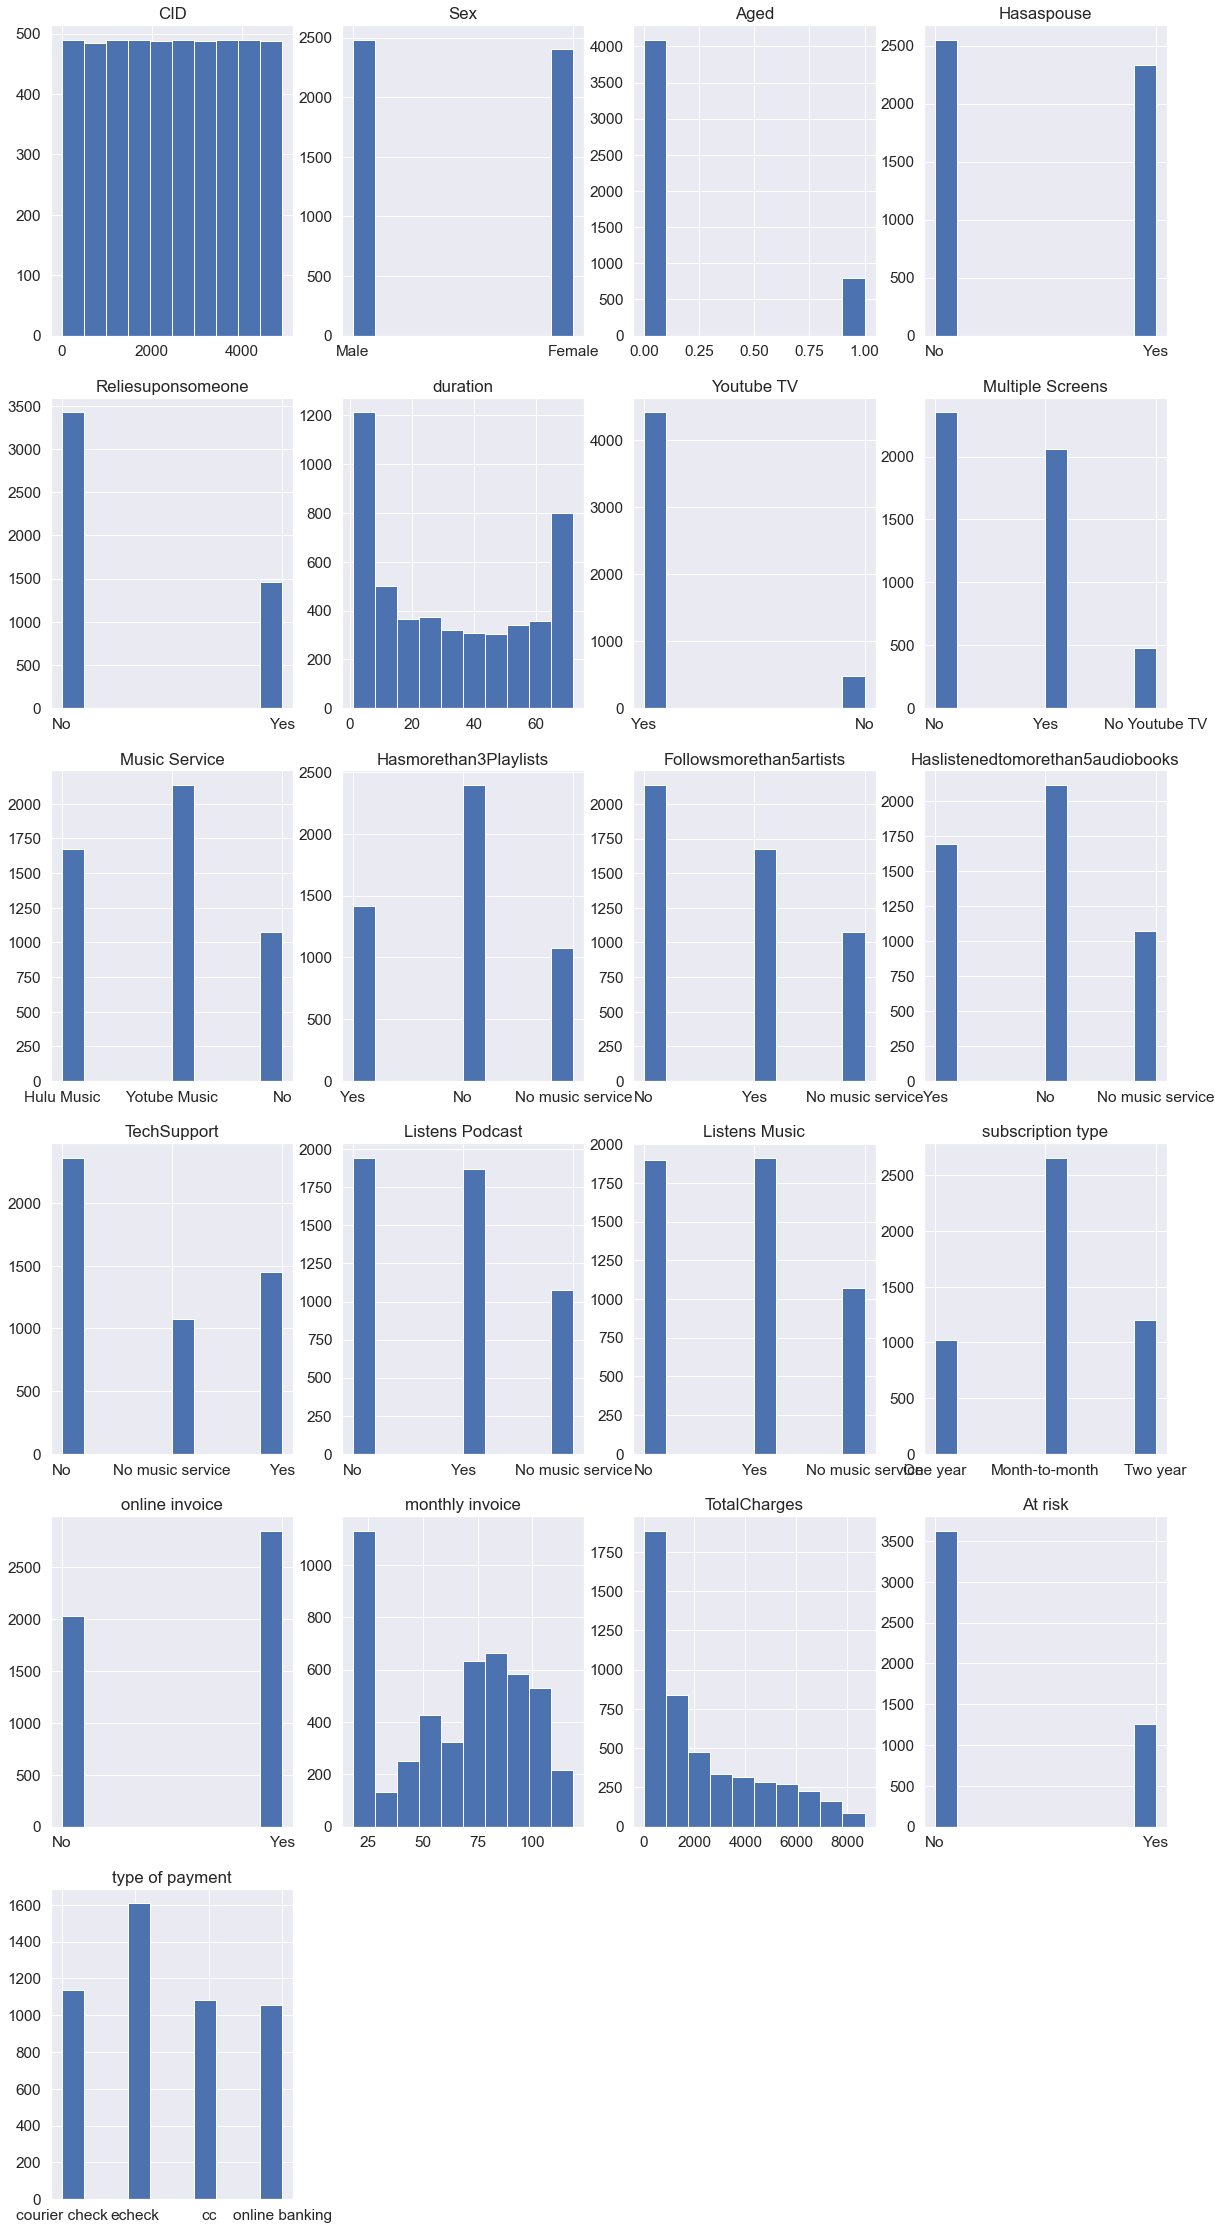

In [163]:
# Histogram plot for each field. To visualize each field separately. This gives us the quick look at all the fields and their values.
fig = plt.figure(figsize=(20, 40))
for i, col in enumerate(df.columns):
    ax = fig.add_subplot(6, 4, i+1)
    ax.set_title(col)
    ax.hist(df[col])
plt.show()

In [164]:
#Converting the predictor variable in a binary numeric variable
df['At risk'].replace({'No':0, 'Yes':1}, inplace=True)

In [165]:
df.head()

,CID,Sex,Aged,Hasaspouse,Reliesuponsomeone,duration,Youtube TV,Multiple Screens,Music Service,Hasmorethan3Playlists,Followsmorethan5artists,Haslistenedtomorethan5audiobooks,TechSupport,Listens Podcast,Listens Music,subscription type,online invoice,monthly invoice,TotalCharges,At risk,type of payment
0,1,Male,0,No,No,34,Yes,No,Hulu Music,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,0,courier check
1,2,Male,0,No,No,2,Yes,No,Hulu Music,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,1,courier check
2,3,Female,0,No,No,2,Yes,No,Yotube Music,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,1,echeck
3,4,Female,0,No,No,8,Yes,Yes,Yotube Music,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,99.65,820.50,1,echeck
4,5,Male,0,No,Yes,22,Yes,Yes,Yotube Music,No,Yes,No,No,Yes,No,Month-to-month,Yes,89.10,1949.40,0,cc


In [166]:
# converting categorical variables into dummy variables.get_dummies function creates a new DataFrame with binary 
# columns for each category present in the original data
    
cusid = df["CID"]
dataset = df.drop(columns="CID")
#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)
#Rejoin userid to dataset:
dataset = pd.concat([dataset, cusid], axis = 1)

In [167]:
dataset.head()

,Aged,duration,monthly invoice,TotalCharges,At risk,Sex_Female,Sex_Male,Hasaspouse_No,Hasaspouse_Yes,Reliesuponsomeone_No,Reliesuponsomeone_Yes,Youtube TV_No,Youtube TV_Yes,Multiple Screens_No,Multiple Screens_No Youtube TV,Multiple Screens_Yes,Music Service_Hulu Music,Music Service_No,Music Service_Yotube Music,Hasmorethan3Playlists_No,Hasmorethan3Playlists_No music service,Hasmorethan3Playlists_Yes,Followsmorethan5artists_No,Followsmorethan5artists_No music service,Followsmorethan5artists_Yes,Haslistenedtomorethan5audiobooks_No,Haslistenedtomorethan5audiobooks_No music service,Haslistenedtomorethan5audiobooks_Yes,TechSupport_No,TechSupport_No music service,TechSupport_Yes,Listens Podcast_No,Listens Podcast_No music service,Listens Podcast_Yes,Listens Music_No,Listens Music_No music service,Listens Music_Yes,subscription type_Month-to-month,subscription type_One year,subscription type_Two year,online invoice_No,online invoice_Yes,type of payment_cc,type of payment_courier check,type of payment_echeck,type of payment_online banking,CID
0,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,2
2,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,3
3,0,8,99.65,820.50,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,4
4,0,22,89.10,1949.40,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,5


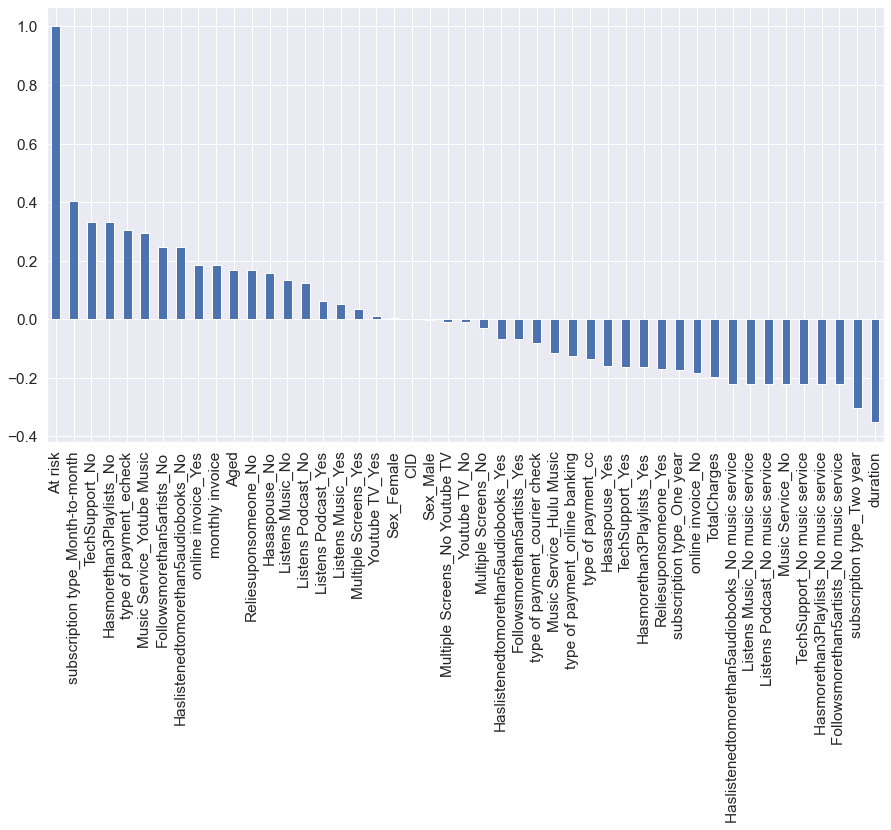

In [168]:
# Showing correlation of At risk with other variables
plt.figure(figsize=(15,8))
dataset.corr()['At risk'].sort_values(ascending = False).plot(kind='bar')

We observe that subscription type 'Month-to-month', 'no tech support' and payments made through 'paycheck' are positively correlated with being 'At Risk,' indicating a higher likelihood of churn. On the other hand, features such as longer 'duration,' subscription types 'One Year' and 'Two Years,' and higher 'Total Charges' exhibit negative correlations with being 'At Risk,' suggesting a lower likelihood of churn.

Notably, payment methods such as 'CC' (Credit Card) and 'online banking' show a negative correlation with being 'At Risk,' which is interesting and may indicate that customers using these payment methods are less likely to churn.

## Data Exploration

**Gender Distribution**: We observe that the distribution of customers is nearly equal based on gender, indicating a balanced representation of both male and female customers in the dataset."

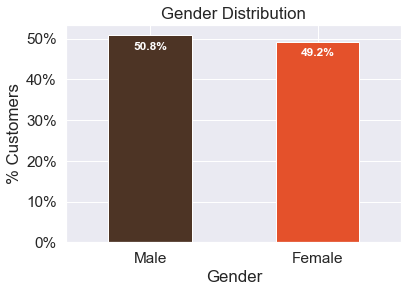

In [169]:
colors = ['#4D3425','#E4512B']
ax = (df['Sex'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

**Aged People distribution**: We can observe that only 16.2% of the customers are in the 'aged' category, indicating that the majority of the customers are young

Text(0.5, 1.0, '% of Aged customers')

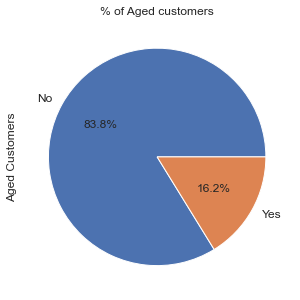

In [170]:
ax = (df['Aged'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Aged Customers',fontsize = 12)
ax.set_title('% of Aged customers', fontsize = 12)

**Spouse and Dependent distribution**: We can observe that approximately 50% of the customers have spouses, while around 30% are dependent on someone else, suggesting varying family structures within the customer base.

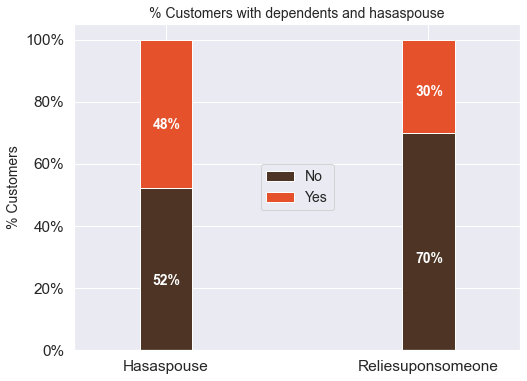

In [171]:
df2 = pd.melt(df, id_vars=['CID'], value_vars=['Reliesuponsomeone','Hasaspouse'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'CID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and hasaspouse',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

An interesting aspect to explore next is the percentage of customers who have a spouse and are also reliant on someone else. This analysis can provide insights into overlapping dependencies within the customer base

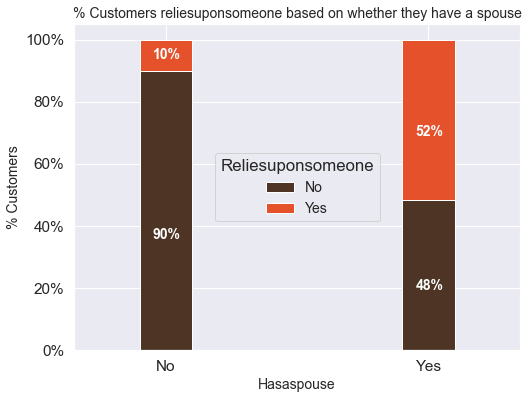

In [172]:
colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Hasaspouse','Reliesuponsomeone']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',width = 0.2,
                                                                      stacked = True,rot = 0, 
                                                                      figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Reliesuponsomeone',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers reliesuponsomeone based on whether they have a spouse',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Interestingly, among customers who have a partner, only about half of them rely upon someone, while the other half do not. Additionally, as expected, among customers who do not have any partner, a majority (90%) of them rely on someone else.

### Customer Account Exploration

**Duration**: We note that a large portion of customers has a subscription duration of just one month, suggesting a substantial influx of new customers. Moreover, it is interesting to observe a significant number of customers with a duration exceeding 70 months, indicating a group of long-term customers. This variation could be attributed to the different subscription types, hinting that the ease of customer retention or departure may be influenced by the specific subscription type they are enrolled in.

C:\Users\sanjy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, '# of Customers by their duration')

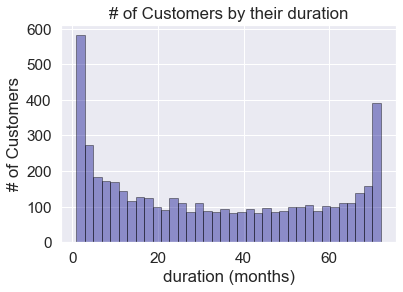

In [173]:
ax = sns.distplot(df['duration'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('duration (months)')
ax.set_title('# of Customers by their duration')

**Subscription Type**:Let's explore the distribution of customers with the subscription type

Text(0.5, 1.0, '# of Customers by Subscription Type')

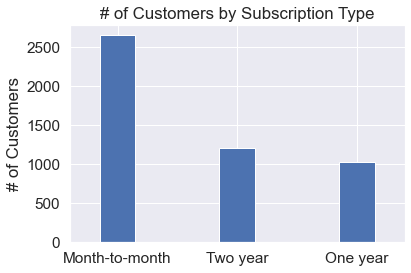

In [174]:
ax = df['subscription type'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Subscription Type')

Observing the distribution of subscription types, it is evident that a majority of customers opt for a month-to-month subscription. In contrast, the number of customers with two-year and one-year subscriptions is nearly equal.

Next we'll try to understand the duration with the subscription type. 

Text(0.5, 1.0, 'Two Year subscription')

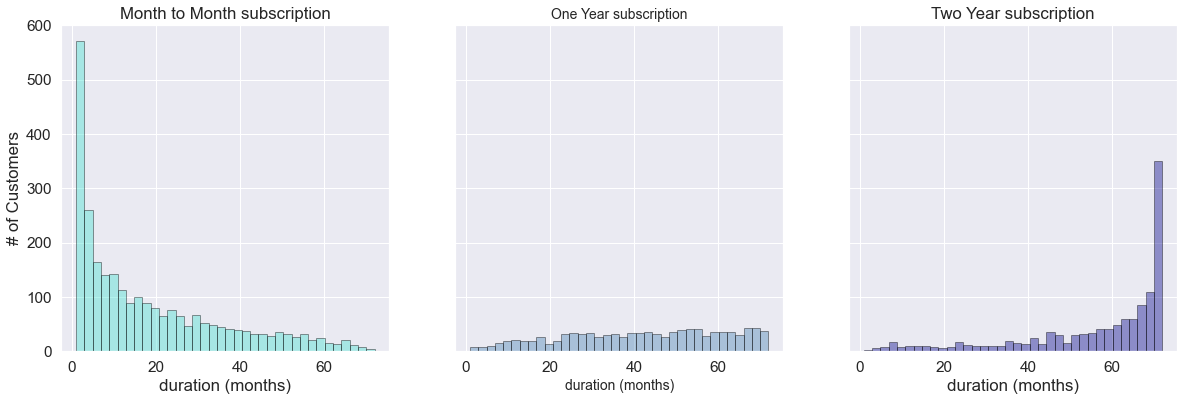

In [175]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['subscription type']=='Month-to-month']['duration'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('duration (months)')
ax.set_title('Month to Month subscription')

ax = sns.distplot(df[df['subscription type']=='One year']['duration'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('duration (months)',size = 14)
ax.set_title('One Year subscription',size = 14)

ax = sns.distplot(df[df['subscription type']=='Two year']['duration'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('duration (months)')
ax.set_title('Two Year subscription')

Interestingly, the analysis reveals that most of the monthly contracts last for 1-2 months, while the 2-year contracts tend to last for about 70 months on average. This pattern suggests that customers opting for longer-term contracts are more loyal to the company and tend to maintain a longer relationship. This observation aligns with our earlier findings in the correlation chart with 'At Risk,' reinforcing the idea that longer contract durations are associated with lower churn risk

Let's exlore different services used by customers

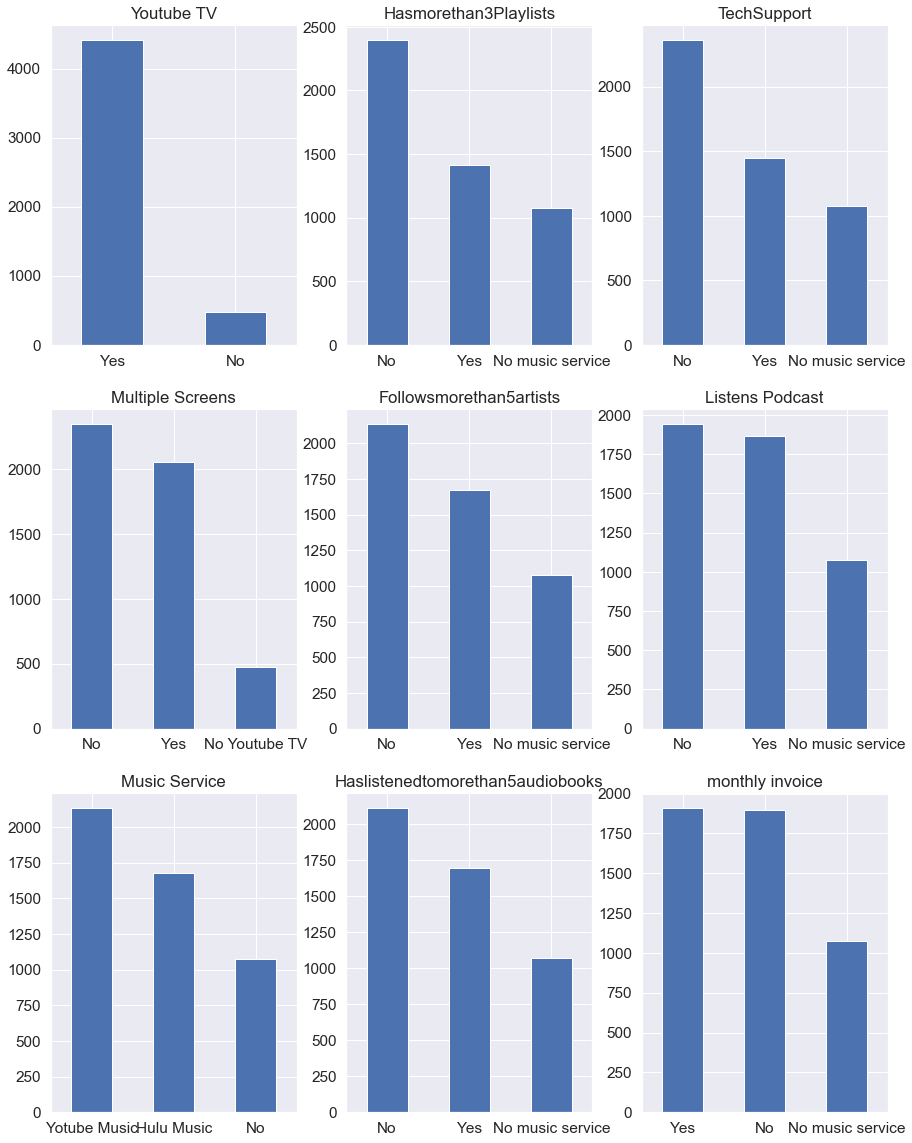

In [176]:
services = ['Youtube TV','Multiple Screens','Music Service', 'Hasmorethan3Playlists', 'Followsmorethan5artists',
            'Haslistenedtomorethan5audiobooks','TechSupport','Listens Podcast','Listens Music','online invoice',
            'monthly invoice' ]

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,20))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Let's take a quck look at the relation between total charges and duration

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


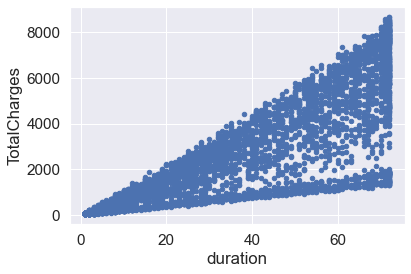

In [177]:
df[['duration', 'TotalCharges']].plot.scatter(x ='duration', y='TotalCharges')

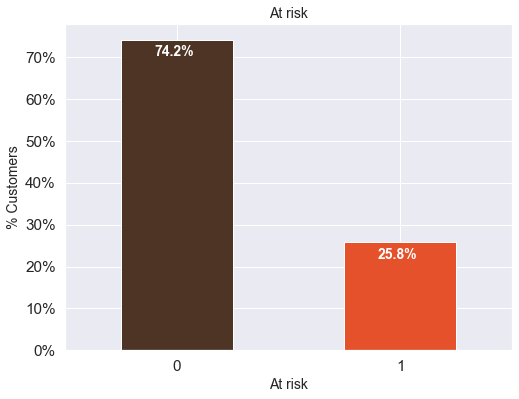

In [178]:
colors = ['#4D3425','#E4512B']
ax = (df['At risk'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('At risk',size = 14)
ax.set_title('At risk', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In our dataset, a substantial 74% of customers are not classified as at risk. It's evident that the data is skewed, which aligns with the expectation of a large majority of customers not being at risk. This observation is crucial to bear in mind during our modeling phase, as skewness in the data may lead to an increased risk of false negatives. We will address strategies to mitigate this skewness in the modeling section. 

Now, let's proceed to explore how churn risk varies across different variables such as duration, age, subscription type, monthly charges, and total charges.

**At risk vs duration**: As depicted in the plot below, it is evident that customers who are not classified as at risk tend to have a longer tenure with the telecom company. The visual representation underscores a correlation between longer customer tenures and a lower likelihood of being at risk.

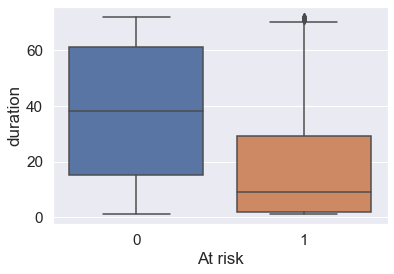

In [179]:
sns.boxplot(x = df['At risk'], y = df['duration'])

 **Churn by Contract Type**: Consistent with our observations in the correlation plot, customers with a month-to-month contract exhibit a notably high churn rate. This reiterates the significance of the contract type in influencing customer retention, with month-to-month contracts being associated with a higher likelihood of churn.

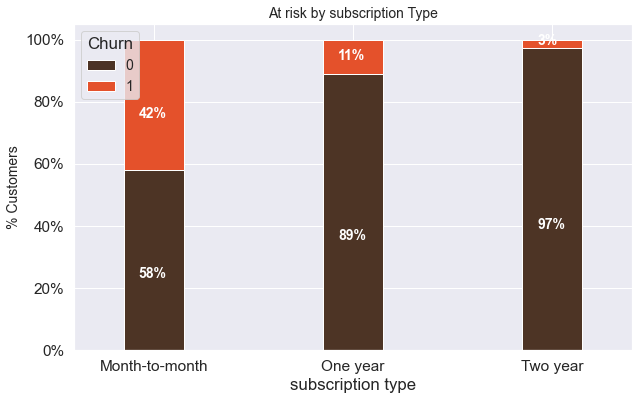

In [180]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['subscription type','At risk']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('At risk by subscription Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Churn by Seniority**: It's noteworthy that senior citizens in our dataset have an almost double churn rate compared to the younger population. This observation highlights a significant difference in churn patterns based on age, with senior citizens exhibiting higher churn rates.

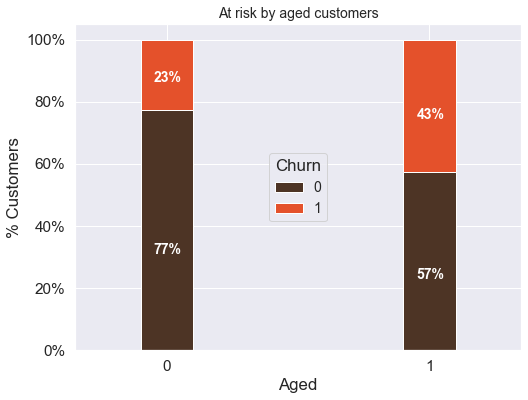

In [181]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['Aged','At risk']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('At risk by aged customers',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

## Data Preprocessing and Model Training

In [182]:
y_test.value_counts(normalize=True)*100

0    74.206755
1    25.793245
Name: At risk, dtype: float64

In [183]:
# Splitting the data into dependent and independent variable
target = dataset["At risk"]
dataset = dataset.drop(columns="At risk")

In [184]:
# Generating training and test datasets in the 80-20 ratio.
X_train, X_test, y_train, y_test = train_test_split(dataset, target,stratify=response, test_size = 0.2, random_state = 0)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3908, 46)
Number transactions y_train dataset:  (3908,)
Number transactions X_test dataset:  (977, 46)
Number transactions y_test dataset:  (977,)


In [185]:
# Removing CID from training and test datasets
train_identity = X_train['CID']
X_train = X_train.drop(columns = ['CID'])
test_identity = X_test['CID']
X_test = X_test.drop(columns = ['CID'])

In [186]:
# Performing feature scaling. We are scaling all the features within the range on 0 to 1. This is an important part to prevent our model being biased towards large value fields.
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

### Comparison of baseline models

We will select the model based on the 'Mean ROC AUC' value, representing the model's ability to discriminate between positive and negative classes. This metric serves as a key criterion in evaluating and choosing the most suitable model for our analysis.

In [187]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))


#Evaluating Model Results: 
    
acc_results = []
auc_results = []
names = []
# Finding evaluation parameter values
col = ['Model Name', 'ROC AUC Mean', 'Accuracy Mean']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=0)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_acc_results.mean()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

C:\Users\sanjy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\sanjy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\sanjy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\Users\sanjy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You

,Model Name,ROC AUC Mean,Accuracy Mean
0,Logistic Regression,84.37,74.54
1,SVC,83.48,80.17
6,Random Forest,82.47,79.48
4,Gaussian NB,81.43,70.83
2,Kernel SVM,80.15,80.22
3,KNN,78.01,76.43
5,Decision Tree Classifier,66.23,73.70


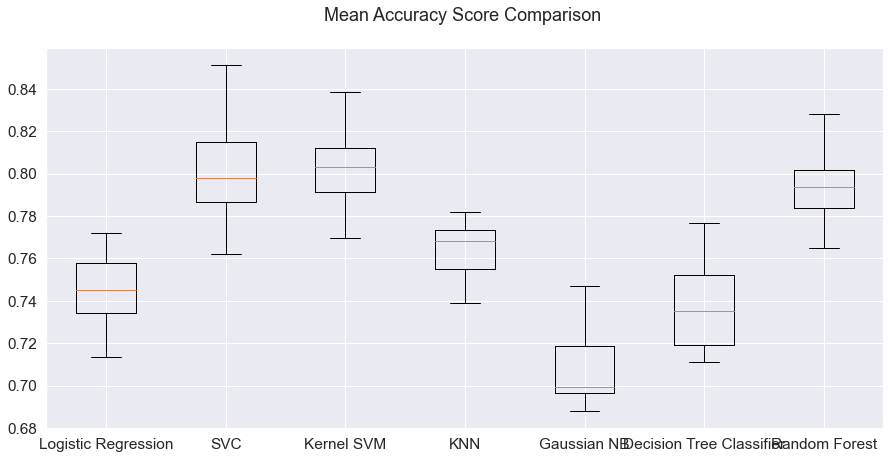

In [188]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.title('Mean Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "18", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

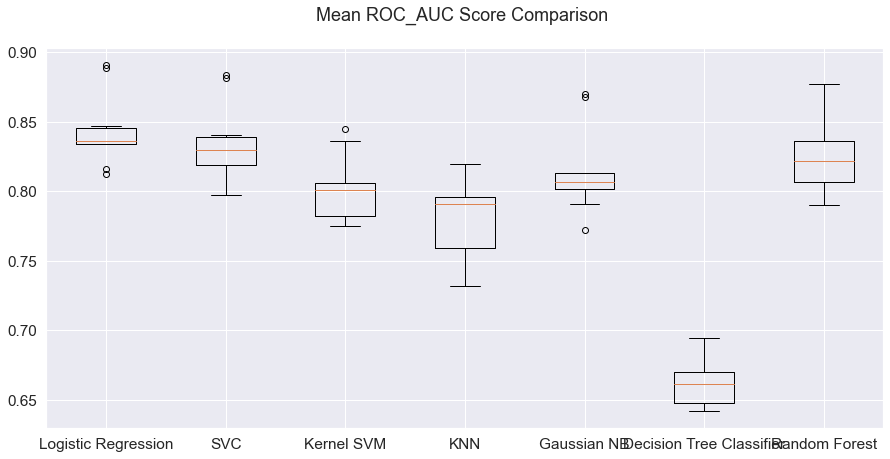

In [189]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.title('Mean ROC_AUC Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "18", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

In the first iteration of baseline classification algorithms, it's evident that Logistic Regression and Support Vector Classifier (SVC) have outperformed the other five models for the selected dataset, exhibiting the highest mean AUC scores. To validate and reconfirm these results, we will proceed with the second iteration as outlined in the subsequent steps

Prior to the second iteration, let's optimize the parameters and finalize the evaluation metrics for model selection. This step will involve fine-tuning the model parameters to enhance performance and choosing appropriate evaluation metrics that align with our specific objectives.

Identify the optimal number of K neighbors for KNN Model

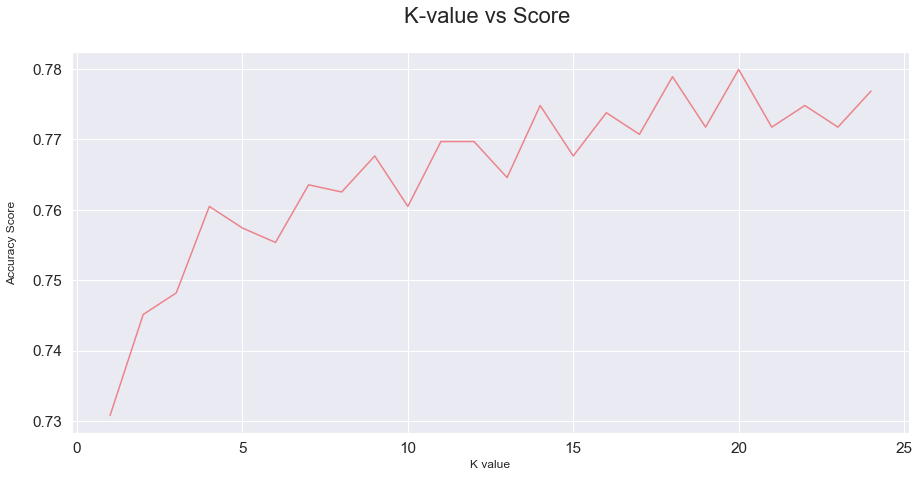

In [190]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Accuracy Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('K value\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('K-value vs Score \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

As we can see from the above iterations, if we use K = 20, then we will get the maximum score of 78%.

Identify the optimal number of estimator for Random Forest Model

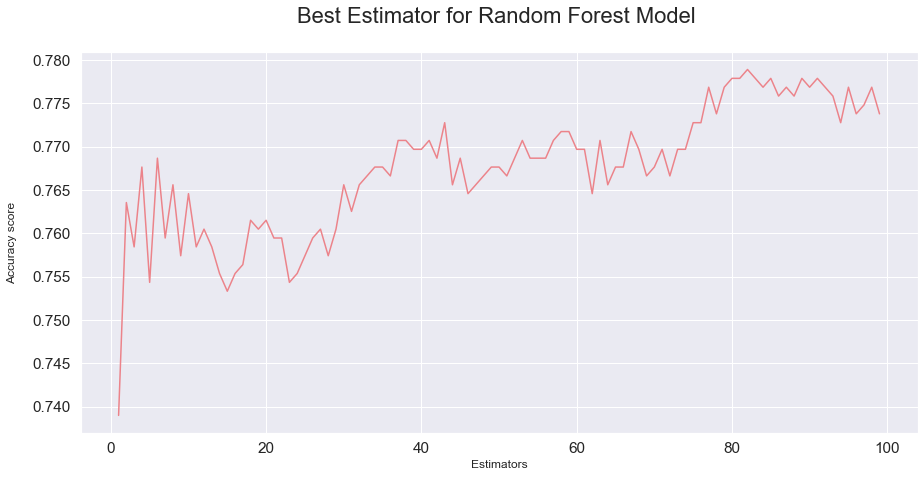

In [191]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
ax.set_facecolor("yellow")
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Accuracy score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Estimators\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Best Estimator for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

As we could see from the iterations above, the random forest model would attain the highest accuracy score when its n_estimators = 82.

### Logistic Regression

In [192]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression  0.795292       0.63     0.5  0.557522  0.521523


In [193]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression  0.795292       0.63     0.5  0.557522  0.521523
1         SVM (Linear)  0.795292       0.63     0.5  0.557522  0.521523


In [194]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 20, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.795292   0.630000  0.500000  0.557522  0.521523
1          SVM (Linear)  0.795292   0.630000  0.500000  0.557522  0.521523
2  K-Nearest Neighbours  0.779939   0.592965  0.468254  0.523282  0.488815


In [195]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Kernel SVM', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.795292   0.630000  0.500000  0.557522  0.521523
1          SVM (Linear)  0.795292   0.630000  0.500000  0.557522  0.521523
3            Kernel SVM  0.784033   0.609626  0.452381  0.519362  0.476987
2  K-Nearest Neighbours  0.779939   0.592965  0.468254  0.523282  0.488815


In [196]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.795292   0.630000  0.500000  0.557522  0.521523
1          SVM (Linear)  0.795292   0.630000  0.500000  0.557522  0.521523
2            Kernel SVM  0.784033   0.609626  0.452381  0.519362  0.476987
3  K-Nearest Neighbours  0.779939   0.592965  0.468254  0.523282  0.488815
4            Naive Byes  0.709314   0.464126  0.821429  0.593123  0.711829


In [197]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.795292   0.630000  0.500000  0.557522  0.521523
1          SVM (Linear)  0.795292   0.630000  0.500000  0.557522  0.521523
2            Kernel SVM  0.784033   0.609626  0.452381  0.519362  0.476987
3  K-Nearest Neighbours  0.779939   0.592965  0.468254  0.523282  0.488815
5         Decision Tree  0.725691   0.466387  0.440476  0.453061  0.445425
4            Naive Byes  0.709314   0.464126  0.821429  0.593123  0.711829


In [198]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 82, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

In [199]:
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.795292   0.630000  0.500000  0.557522  0.521523
1          SVM (Linear)  0.795292   0.630000  0.500000  0.557522  0.521523
2            Kernel SVM  0.784033   0.609626  0.452381  0.519362  0.476987
3  K-Nearest Neighbours  0.779939   0.592965  0.468254  0.523282  0.488815
4         Decision Tree  0.725691   0.466387  0.440476  0.453061  0.445425
5            Naive Byes  0.709314   0.464126  0.821429  0.593123  0.711829
6         Random Forest  0.773797   0.588571  0.408730  0.482436  0.435334


Based on the results from the second iteration, it is evident that logistic regression emerges as the optimal model for the given dataset. This conclusion is drawn from its relatively highest combination of precision, recall, and F2 scores. Logistic regression achieves a balance of making the most correct positive predictions while minimizing false negatives. Therefore, in the forthcoming sections, we will proceed to utilize Logistic Regression and evaluate its performance.

Train & evaluate Chosen Model(Logistic Regression)

In [200]:

classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)


# Predict the Test set results
y_pred = classifier.predict(X_test)


#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression  0.795292       0.63     0.5  0.557522  0.521523


Performing k-Fold Cross-Validation to fix the variance problem

In [201]:
# Re-check k-Fold Cross Validation:

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.81 (+/- 0.05)


**Confision Matrix**

Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

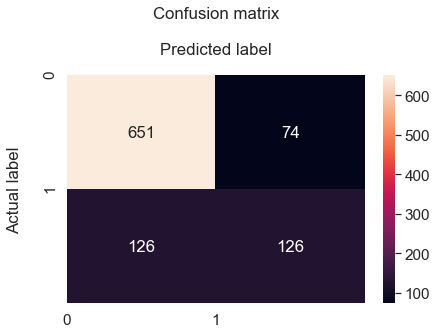

In [202]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

**Model Evaluation using ROC graph**

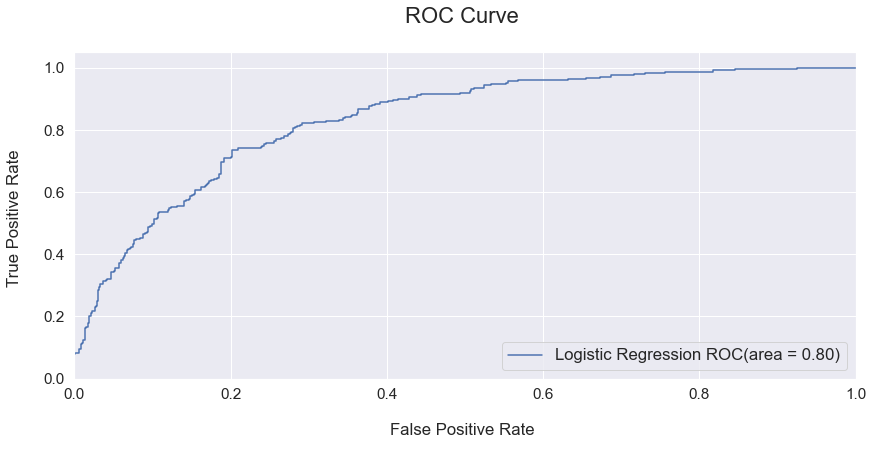

In [203]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression ROC(area = %0.2f)' % classifier_roc_auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Curve \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

**Predicting Feature Importance**

In [204]:
# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'CID').columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
3,TotalCharges,0.741567
36,subscription type_Month-to-month,0.320037
17,Music Service_Yotube Music,0.258745
32,Listens Podcast_Yes,0.135146
43,type of payment_echeck,0.131422
0,Aged,0.117897
18,Hasmorethan3Playlists_No,0.115158
35,Listens Music_Yes,0.109090
27,TechSupport_No,0.100778
14,Multiple Screens_Yes,0.090685


The logistic regression model predicts a positive correlation between the risk rate and variables such as TotalCharges, subscription type month-to-month, electronic checks as the payment method, and the absence of tech support. 

Conversely, the model predicts a negative correlation with the risk rate for customers with longer durations, subscription types of two years or one year, and those using online banking or courier checks as modes of payment.

### Improving the model

Performing hyper parameter tuning via Grid Search:

In [205]:

# Iteration 1
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)

Took 8.09 seconds


(0.7191864117446227, {'C': 10, 'penalty': 'l2'})

In [206]:
# Iteration 2:
    
# Select Regularization Method
import time
penalty = ['l2']

# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)

Took 0.59 seconds


(0.7092755206555138, {'C': 0.05, 'penalty': 'l2'})

### Finalizing the model

In [207]:
# Finalizing the model with best hyperparameters 
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)

# Predict the Test set results

y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1] 

In [208]:
#Revalidate final results with Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
print (cm)

[[651  74]
 [126 126]]


In [210]:
#Confusion Matrix as a quick Crosstab:
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,103,29
1,39,6


Test Data Accuracy: 0.7953


<Figure size 2016x1440 with 0 Axes>

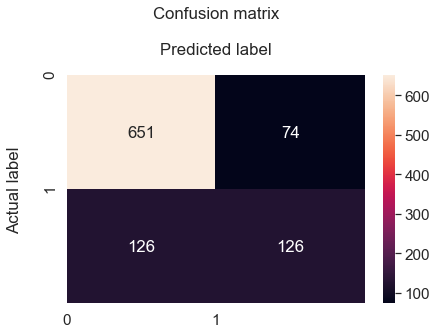

In [211]:
#visualize Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Predictions

In [212]:

final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred 
final_results["at_risk(%)"] = y_pred_probs 
final_results["at_risk(%)"] = final_results["at_risk(%)"]*100
final_results["at_risk(%)"]=final_results["at_risk(%)"].round(2)
final_results = final_results[['CID', 'At risk', 'predictions', 'at_risk(%)']]
final_results ['Ranking'] = pd.qcut(final_results['at_risk(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

print (final_results)

       CID  At risk  predictions  at_risk(%) Ranking
220    221        0            0       42.59       3
888    889        1            1       73.12       1
3002  3003        0            0        0.91      10
2620  2621        1            1       69.13       1
1382  1383        1            0       29.18       4
...    ...      ...          ...         ...     ...
3370  3371        0            0        0.14      10
3700  3701        0            0        7.21       7
3734  3735        1            0       18.58       5
1740  1741        1            0       43.31       3
3080  3081        0            0       35.30       4

[977 rows x 5 columns]


In [213]:
# Saving final result into a dataframe
final_results = pd.DataFrame(final_results)

In [215]:
# Exporting the final results
final_results.to_excel('Final_Result_File_1.xlsx', index=False)